# Pymaceuticals Inc.
---

### Analysis

This analysis looked at the relationship between tumor volume and drug regimen for 10 different drugs on both male and female mice. The drugs Capomulin, Ramicane, Infubinol, and Ceftamin were observed in particular. 

Results: 
Capomulin and Ramicane showed greatest decreases in tumor volume as opposed to Infubinol and Ceftamin, as well as a smaller variance in distribution, implying that not only could the former two be possibly more effective, but also generate more reliable results. 

When a single mouse was observed on the Capomulin treatment, a drastic decrease in tumor volume was observed, howevever, towards the end of the regimen there seemed to be a slight uptick, possibly meaning that Capomulin is only effective for a period of time. Further research would be needed to test this hypothesis, as these results might be due to chance. 

The correlation between mouse weight and tumor volume was measured, with a determined correlation of .83, meaning that 83% of the variance in mouse weight can be accounted for by the variance in tumor volume. This high correlation demonstrates that mouse weight could be used as a good metric for determining tumor volume in future studies to reduce cost and time. 


 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how="left")

# Display the data table for preview
pharma.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice.
mouse_count = pharma["Mouse ID"].nunique()
mouse_count

249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates = pharma[pharma.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#duplicate_mice = duplicates['Mouse ID'].unique()
#duplicate_mice

In [41]:
duplicates = pharma.loc[pharma['Mouse ID'] == 'g989']
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pharma[pharma['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df['Mouse ID'].unique()
clean_mouse_count
len(clean_mouse_count)

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_data = clean_df.groupby('Drug Regimen')
mean_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_volume = grouped_data['Tumor Volume (mm3)'].median()
var_volume = grouped_data['Tumor Volume (mm3)'].var()
std_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_volume = grouped_data['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.

summary_data = pd.DataFrame({
    'Mean Tumor Volume': mean_volume,
    'Median Tumor Volume': median_volume,
    'Tumor Volume Variance': var_volume,
    'Tumor Volume Std. Dev.': std_volume,
    'Tumor Volume Std. Err.': sem_volume,
})

summary_data
    



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_df2.head()

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

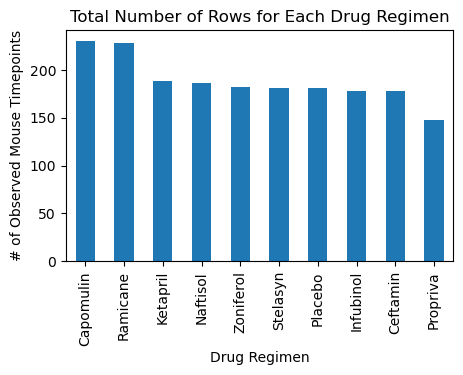

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind='bar', figsize=(5, 3))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

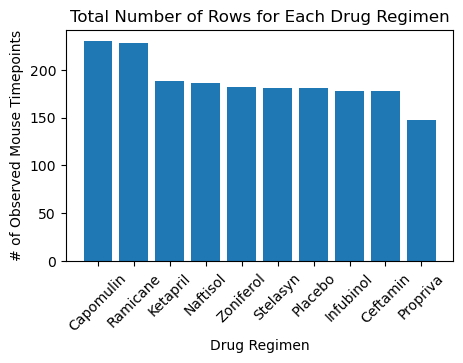

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(5, 3))  
plt.bar(counts.index, counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

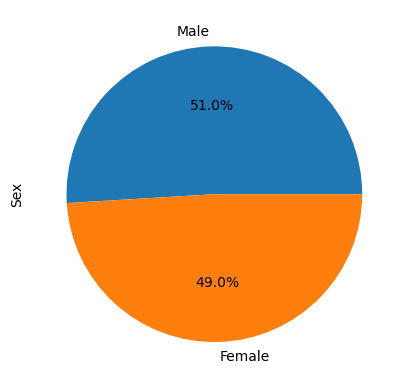

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()


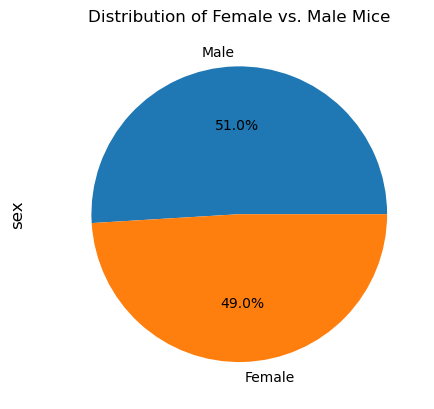

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
labels = ['Male', 'Female']
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%')  
plt.text(-1.5, 0, f"sex", fontsize=12, ha='center', va='center', rotation=90)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoints = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)] \
    .groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(clean_df, last_timepoints, on = 'Mouse ID', how="left")
final_df = final_df[final_df['Drug Regimen'].isin(treatment_regimens)]
final_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.0,0,Capomulin,Female,9,22,45.0
29,c326,0,45.0,0,Infubinol,Female,18,25,5.0
30,c139,0,45.0,0,Infubinol,Male,11,28,45.0
31,v339,0,45.0,0,Infubinol,Male,20,26,5.0
32,a577,0,45.0,0,Infubinol,Female,6,25,30.0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

potential_outliers_dict = {}
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_df[final_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the quartiles (Q1 and Q3)
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds to identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter the potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Store the potential outliers in the dictionary
    potential_outliers_dict[treatment] = potential_outliers
    
    # Append the tumor volumes to the tumor_vol_data list for plotting
    tumor_vol_data.append(tumor_volumes)


for treatment, potential_outliers in potential_outliers_dict.items():
    print(f"{treatment}'s potential outliers:\n{potential_outliers}\n")

Capomulin's potential outliers:
1639    25.472143
1836    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:
1801    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



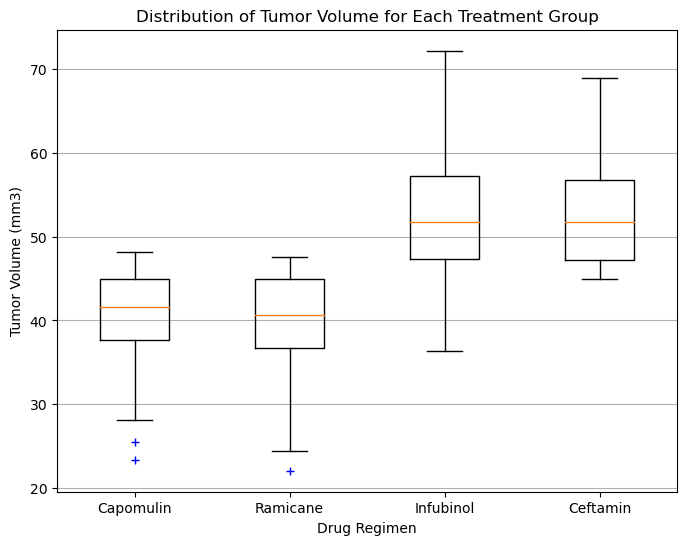

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))  
plt.boxplot(tumor_vol_data, labels=treatments, sym='b+')  
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.grid(axis='y') 
plt.show()

## Line and Scatter Plots

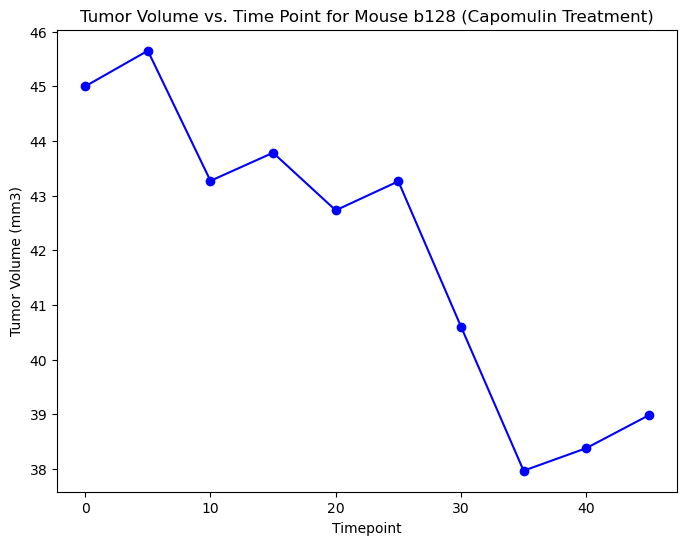

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'b128'

mouse_data = final_df[(final_df['Mouse ID'] == selected_mouse_id) & (final_df['Drug Regimen'] == 'Capomulin')]
plt.figure(figsize=(8, 6))  
plt.plot(mouse_data['Timepoint_x'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin Treatment)')
plt.show()

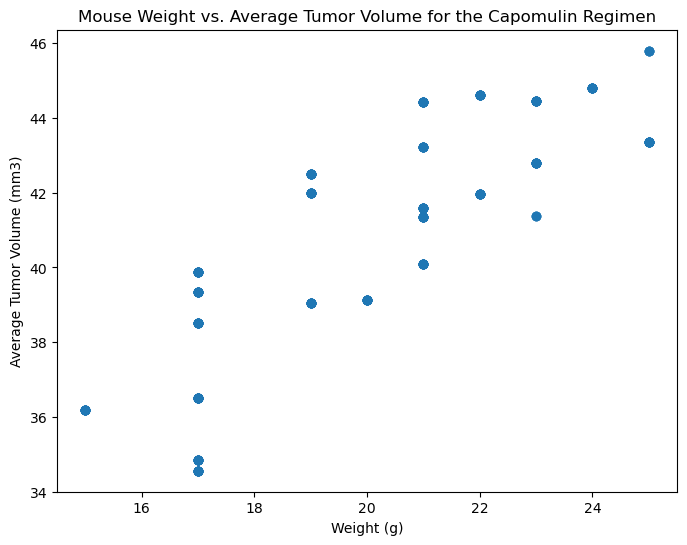

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to include only the 'Capomulin' treatment
capomulin_df = final_df[final_df['Drug Regimen'] == 'Capomulin']

# Group the filtered DataFrame by 'Mouse ID' to calculate the average tumor volume
average_tumor_volume_df = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

#  Create a new DataFrame with the unique 'Mouse ID' and its corresponding average tumor volume
average_tumor_volume_df = pd.DataFrame({
    'Mouse ID': average_tumor_volume_df['Mouse ID'],
    'Average Tumor Volume (mm3)': average_tumor_volume_df['Tumor Volume (mm3)']
})

# Merge the new DataFrame with the original 'final_df' DataFrame to include the 'Weight (g)' column
average_tumor_volume_df = pd.merge(average_tumor_volume_df, final_df[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

# Step 5: Generate the scatter plot
plt.figure(figsize=(8, 6))  
plt.scatter(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.8343958614425957


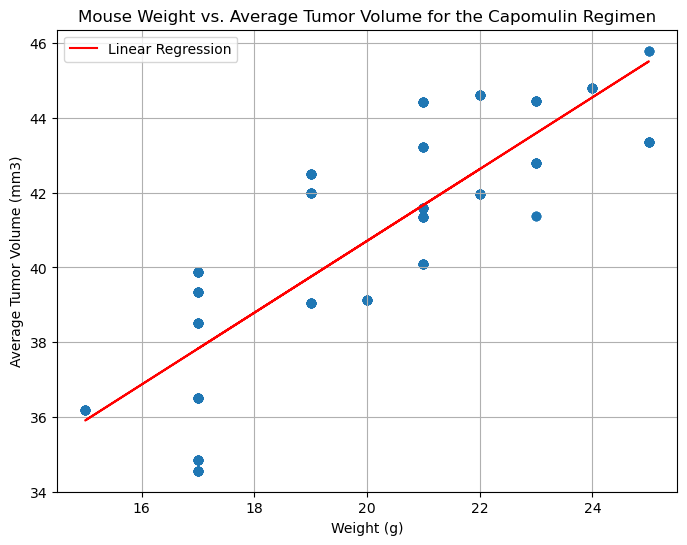

Correlation Coefficient: 0.8343958614425957
Slope: 0.9609669432428362
Intercept: 21.48982721329954
R-squared value: 0.6962164535925314
P-value: 6.495737656135933e-61


In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = average_tumor_volume_df['Weight (g)'].corr(average_tumor_volume_df['Average Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and tumor volume is {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Average Tumor Volume (mm3)'])

plt.figure(figsize=(8, 6))  # Optional: Set the figure size (width, height) in inches
plt.scatter(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Average Tumor Volume (mm3)'])
plt.plot(average_tumor_volume_df['Weight (g)'], slope * average_tumor_volume_df['Weight (g)'] + intercept, color='r', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.legend()  # Optional: Add legend to the plot
plt.grid(True)  # Optional: Add grid lines
plt.show()

# Step 8: Print the correlation coefficient and linear regression parameters
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
